In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [5]:
from sklearn.datasets import load_boston
boston=load_boston()

In [6]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [7]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [8]:
dataset=pd.DataFrame(boston.data, columns=boston.feature_names)

In [9]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [10]:
dataset['Price']=boston.target
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


<Axes: >

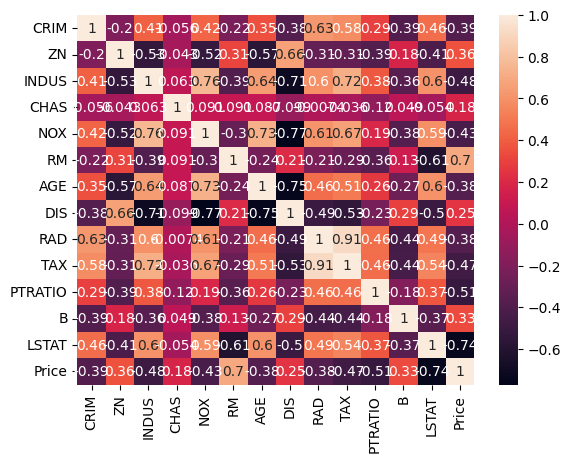

In [11]:
sns.heatmap(dataset.corr(), annot=True)

In [12]:
# sns.pairplot(dataset)

Text(0, 0.5, 'Price')

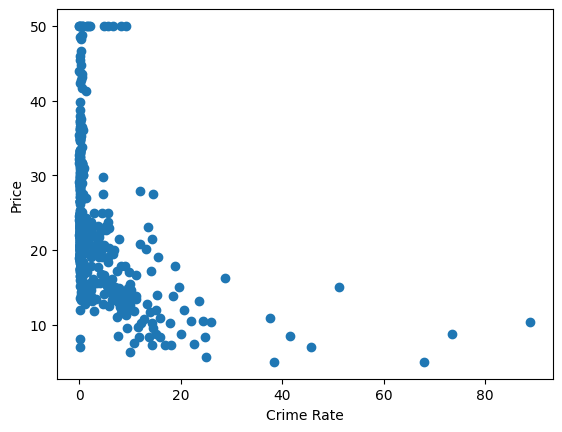

In [13]:
plt.scatter(dataset['CRIM'], dataset['Price'])
plt.xlabel('Crime Rate')
plt.ylabel("Price")

Text(0, 0.5, 'Price')

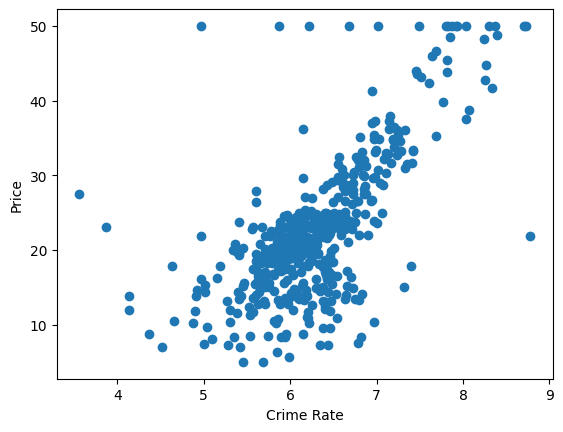

In [14]:
plt.scatter(dataset['RM'], dataset['Price'])
plt.xlabel('Crime Rate')
plt.ylabel("Price")

Text(0, 0.5, 'Price')

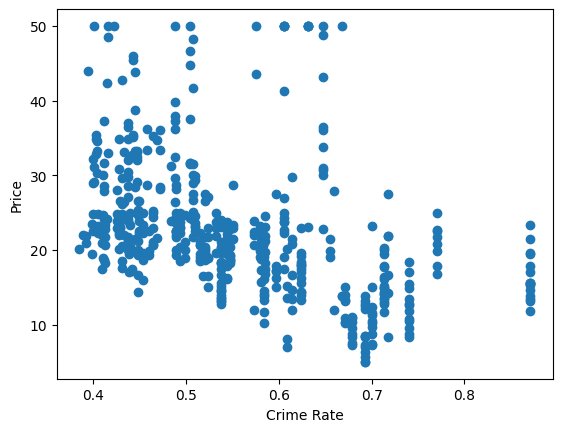

In [15]:
plt.scatter(dataset['NOX'], dataset['Price'])
plt.xlabel('Crime Rate')
plt.ylabel("Price")

<Axes: xlabel='NOX', ylabel='Price'>

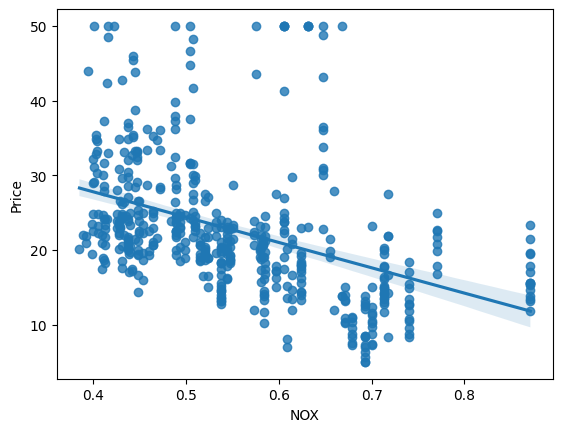

In [16]:
sns.regplot(x='NOX', y='Price', data=dataset)

In [17]:
X=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [18]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()


In [21]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [22]:
import pickle 
pickle.dump(scaler,open('scaling.pkl','wb'))

In [23]:
X_train

array([[ 1.28770177, -0.50032012,  1.03323679, ...,  0.84534281,
        -0.07433689,  1.75350503],
       [-0.33638447, -0.50032012, -0.41315956, ...,  1.20474139,
         0.4301838 , -0.5614742 ],
       [-0.40325332,  1.01327135, -0.71521823, ..., -0.63717631,
         0.06529747, -0.65159505],
       ...,
       [-0.40547014,  2.95931752, -1.30336132, ..., -0.59225149,
         0.37901005, -0.91069248],
       [ 0.85189733, -0.50032012,  1.03323679, ...,  0.84534281,
        -2.69458597,  1.52257036],
       [-0.38135592, -0.50032012, -0.35216694, ...,  1.15981657,
        -3.12158061, -0.25731635]])

In [24]:
X_test

array([[-0.39680933, -0.50032012, -1.00711147, ..., -0.77195078,
         0.42887165, -0.48121032],
       [-0.40079621,  1.2294987 , -0.66439105, ..., -0.32270256,
         0.44418004, -1.25709448],
       [-0.39523443, -0.50032012,  2.43316256, ...,  0.80041799,
         0.36993437,  0.79033849],
       ...,
       [ 1.1779666 , -0.50032012,  1.03323679, ...,  0.84534281,
        -3.5124912 ,  1.23390203],
       [-0.40131065, -0.50032012, -0.94321444, ...,  0.08162084,
         0.43422959,  0.05669848],
       [-0.39643252, -0.50032012,  0.26792466, ...,  0.17147048,
         0.29470458, -0.49529171]])

In [25]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [26]:
print(reg.intercept_)

22.796534653465375


In [27]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [28]:
reg.predict(X_test)


array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

In [29]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [30]:
lr.coef_

array([-1.00213533,  0.69626862,  0.27806485,  0.7187384 , -2.0223194 ,
        3.14523956, -0.17604788, -3.0819076 ,  2.25140666, -1.76701378,
       -2.03775151,  1.12956831, -3.61165842])

In [31]:
reg_pred=lr.predict(X_test)

In [32]:
reg_pred

array([28.99672362, 36.02556534, 14.81694405, 25.03197915, 18.76987992,
       23.25442929, 17.66253818, 14.34119   , 23.01320703, 20.63245597,
       24.90850512, 18.63883645, -6.08842184, 21.75834668, 19.23922576,
       26.19319733, 20.64773313,  5.79472718, 40.50033966, 17.61289074,
       27.24909479, 30.06625441, 11.34179277, 24.16077616, 17.86058499,
       15.83609765, 22.78148106, 14.57704449, 22.43626052, 19.19631835,
       22.43383455, 25.21979081, 25.93909562, 17.70162434, 16.76911711,
       16.95125411, 31.23340153, 20.13246729, 23.76579011, 24.6322925 ,
       13.94204955, 32.25576301, 42.67251161, 17.32745046, 27.27618614,
       16.99310991, 14.07009109, 25.90341861, 20.29485982, 29.95339638,
       21.28860173, 34.34451856, 16.04739105, 26.22562412, 39.53939798,
       22.57950697, 18.84531367, 32.72531661, 25.0673037 , 12.88628956,
       22.68221908, 30.48287757, 31.52626806, 15.90148607, 20.22094826,
       16.71089812, 20.52384893, 25.96356264, 30.61607978, 11.59

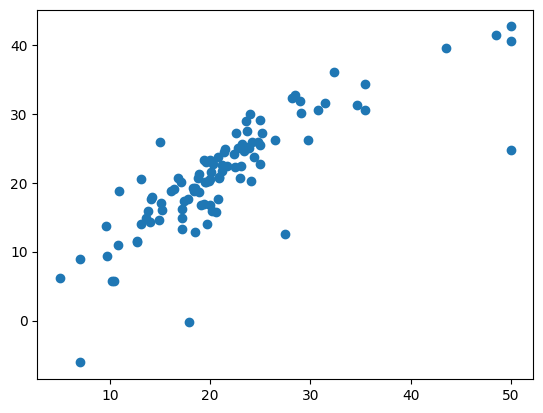

In [33]:
# plot a scatterplot for the prediction
plt.scatter(y_test,reg_pred)

# prediction wrt to residual
residuals=y_test-reg_pred
residuals

In [34]:
residuals=y_test-reg_pred

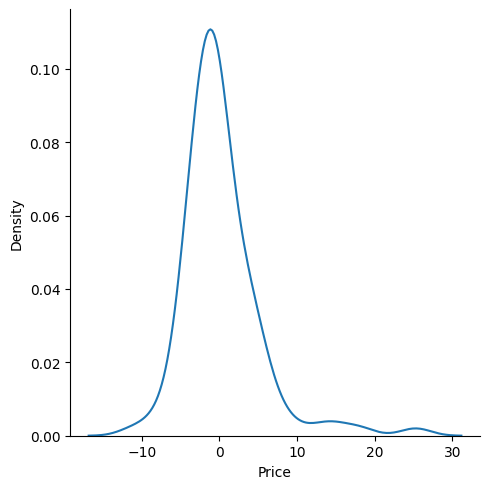

In [35]:
sns.displot(residuals, kind='kde')

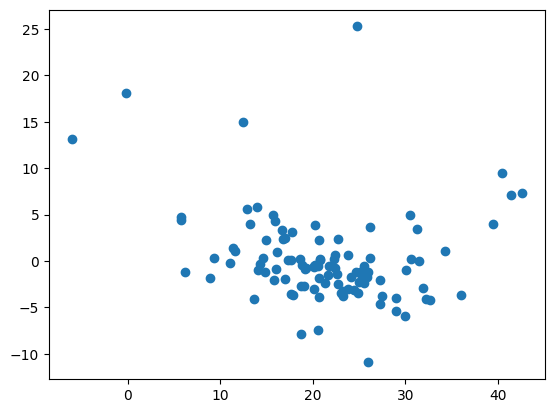

In [36]:
plt.scatter(reg_pred,residuals)

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,reg_pred))
print(mean_squared_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

3.189091965887848
24.29111947497351
4.928602182665336


# calulating (residual)^2 and adjusted r^2
from sklearn.metrics import r2_score
score=r2_score(y_test, reg_pred)
print(score)

In [38]:
from sklearn.metrics import r2_score 
score=r2_score(y_test, reg_pred) 
print(score)

0.6687594935356321


In [39]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6198262368988505

In [40]:
scaler.transform(boston.data[0].reshape(1,-1))

d:\coding\ml\boston_project\bostonhousepricing\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.4064505 ,  0.27809835, -1.25979517, -0.27808871, -0.15723342,
         0.365677  , -0.1200431 ,  0.13239061, -0.97404758, -0.65092617,
        -1.35597347,  0.44418004, -1.05291444]])

In [41]:
lr.predict(scaler.transform(boston.data[0].reshape(1,-1)))

d:\coding\ml\boston_project\bostonhousepricing\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([29.95339638])

In [42]:
import pickle

In [43]:
pickle.dump(lr, open('lrmodel.pkl','wb'))

In [44]:
pickled_model=pickle.load(open('lrmodel.pkl','rb'))

In [45]:
##prediction
pickled_model.predict(scaler.transform(boston.data[0].reshape(1,-1)))

d:\coding\ml\boston_project\bostonhousepricing\venv\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([29.95339638])